In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# FILE_PATH = "../AutoBots/h5_files/test_dataset.hdf5"
FILE_PATH = "../AutoBots/h5_files/train_dataset.hdf5"


hd5_file = h5py.File(FILE_PATH, "r")

In [11]:
print(list(hd5_file.keys()))
for key in hd5_file:
    print(f"KEY: {key}")
    print(hd5_file[key].shape)
    print(hd5_file[key].dtype)

['agents_trajectories', 'ego_trajectories', 'extras', 'orig_egos', 'road_pts']
KEY: agents_trajectories
(205942, 50, 15, 3)
float32
KEY: ego_trajectories
(205942, 50, 3)
float32
KEY: extras
(205942, 4)
float32
KEY: orig_egos
(205942, 50, 3)
float32
KEY: road_pts
(205942, 150, 10, 3)
float16


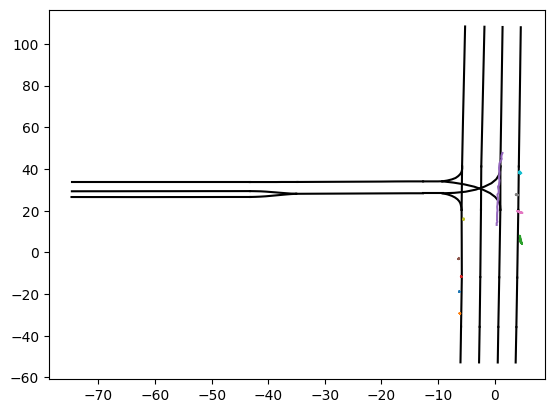

In [15]:
start = 2
duration = 1
# duration = hd5_file["ego_trajectories"].shape[0]//10
for t in range(start, start + duration):
    # print(t)
    #plot road points in black
    road_pts = np.array(hd5_file["road_pts"][t])
    segments = 0
    for segment_pts in np.rollaxis(road_pts, 0):
        if np.all(np.abs(segment_pts) < 1e-6):
            continue
        segments += 1
        X, Y, Z = segment_pts.T
        plt.plot(X, Y, "k")
    #plot agent trajectories
    agent_count = 0
    agent_trajectories = hd5_file["agents_trajectories"][t]
    for agent_trajectory in np.rollaxis(agent_trajectories, 1):
        if np.all(np.abs(agent_trajectory) < 1e-6):
            continue
        mask = np.logical_not(np.logical_and.reduce(np.abs(agent_trajectory) < 1e-6, 1))
        X, Y, Z = agent_trajectory[mask].T
        plt.plot(X, Y)
        agent_count += 1
        # print(agent_trajectory)


    # #plot the ego vehicle trajectory
    # # ego_trajectory = np.array(hd5_file["orig_egos"][t])
    # # X, Y, Z = ego_trajectory.T
    # # plt.plot(X, Y, "r")
    # ego_trajectory = np.array(hd5_file["ego_trajectories"][t])
    # X, Y, Z = ego_trajectory.T
    # plt.plot(X, Y, "b")

    # plt.xlim()